## **Etapas do Projeto de Ciências de Dados Airbnb**

Descrição das etapas que serão seguidas:

1. Entendimento do Desafio a ser resolvido;
2. Entendimento da Empresa/Área;
3. Extração/Obtenção de Dados;
4. Ajustes de Dados (Limpeza de Dados);
5. Análise Exploratória;
6. Modelagem + Algortimo;
7. Interpretação dos Resultados;
8. Deploy/Produção.

## **Projeto Airbnb Rio - Ferramenta de Previsão de Preço de Imóvel para pessoas comuns**

**Contexto**

O Airbnb é uma plataforma online que conecta anfitriões e hóspedes para o aluguel de acomodações. A plataforma está disponível em site e app para celulares Android e iPhone (iOS).
O Airbnb oferece:

* Propriedades inteiras, como casas e apartamentos
* Quartos em residências e pousadas
* Hospedagens mais inusitadas, como barcos, fazendas e ilhas inteiras
* Experiências inspiradoras oferecidas por especialistas da região
* Aventuras Airbnb, para experiências imersivas
* Airbnb for Work, com lugares com as melhores avaliações e espaços colaborativos

**Nosso ojetivo**

Contruir um modelo de previsão que permita uma pessoa comum que possui um imóvel possa saber quanto deve cobrar pela diária do seu imóvel.

Ou ainda, para um locador comum, dado o imóvel que procura, saber se o preço está atrativo ou não.

**O que temos disponível, inspirações e créditos**

As bases de dados foram retiradas do site kaggle: https://www.kaggle.com/datasets/allanbruno/airbnb-rio-de-janeiro/data


**Expectativas Iniciais**

Descobrir a influência de alguns fatores que impactam na análise do projeto.



### **Importação de bibliotecas e base de dados**

In [1]:
#  Importação de bibliotecas
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import pickle

In [5]:
meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez':12}

caminho_bases = pathlib.Path(r'diretorio\dataset') # Colocar o diretório onde foi salvo o dataset


all_dfs = []

for arquivo in caminho_bases.iterdir():
  if arquivo.name.endswith('.csv') and arquivo.name[:3] in meses:
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]
    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv', ''))

    df = pd.read_csv(caminho_bases / arquivo.name)
    df['ano'] = ano
    df['mes'] = mes
    all_dfs.append(df)
  else:
    print(f"Ignorando o arquivo: {arquivo.name} - Arquivo ou nome do arquivo inválido.") # Print uma mensagem para pular o arquivo

base_airbnb = pd.concat(all_dfs, ignore_index=True)

display(base_airbnb)

C:\Users\DaniloSantos\AppData\Local\Temp\ipykernel_9792\3157701709.py:15: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\DaniloSantos\AppData\Local\Temp\ipykernel_9792\3157701709.py:15: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\DaniloSantos\AppData\Local\Temp\ipykernel_9792\3157701709.py:15: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\DaniloSantos\AppData\Local\Temp\ipykernel_9792\3157701709.py:15: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\DaniloSantos\AppData\Local\Temp\ipykernel_9792\3157701709.py:15: DtypeWarning: C

Ignorando o arquivo: total_data-001.csv - Arquivo ou nome do arquivo inválido.


id                            listing_url       scrape_id  \
0          14063     https://www.airbnb.com/rooms/14063  20180414160018   
1          17878     https://www.airbnb.com/rooms/17878  20180414160018   
2          24480     https://www.airbnb.com/rooms/24480  20180414160018   
3          25026     https://www.airbnb.com/rooms/25026  20180414160018   
4          31560     https://www.airbnb.com/rooms/31560  20180414160018   
...          ...                                    ...             ...   
893149  38844730  https://www.airbnb.com/rooms/38844730  20190923212307   
893150  38846408  https://www.airbnb.com/rooms/38846408  20190923212307   
893151  38846703  https://www.airbnb.com/rooms/38846703  20190923212307   
893152  38847050  https://www.airbnb.com/rooms/38847050  20190923212307   
893153  38847655  https://www.airbnb.com/rooms/38847655  20190923212307   

       last_scraped                                          name  \
0        2018-04-14                          Living in a Postcard   
1        2018-04-14             Very Nice 2Br - Copacabana - WiFi   
2        2018-04-14              Nice and cozy near Ipanema Beach   
3        2018-04-14     Beautiful Modern Decorated Studio in Copa   
4        2018-04-14              NICE & COZY 1BDR - IPANEMA BEACH   
...             ...                                           ...   
893149   2019-09-24             TRANSAMERICA BARRA DA TIJUCA R IV   
893150   2019-09-24                      Alugo para o Rock in Rio   
893151   2019-09-24  Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA   
893152   2019-09-24                     Cobertura Cinematografica   
893153   2019-09-24     Quarto em cobertura em frente à praia III   

                                                  summary  \
0       Besides the most iconic's view, our apartment ...   
1       Please note that special rates apply for New Y...   
2       My studio is located in the best  of Ipanema. ...   
3       Our apartment is a little gem, everyone loves ...   
4       This nice and clean 1 bedroom apartment is loc...   
...                                                   ...   
893149  Em estilo contemporâneo, o Transamerica Prime ...   
893150  Confortável apartamento, 2 quartos , sendo 1 s...   
893151  Apartamento quarto e sala COMPLETO para curtas...   
893152                               Cobertura alto nivel   
893153  Quarto em cobertura quadriplex com vista lindí...   

                                                    space  \
0                                                     NaN   
1       - large balcony which looks out on pedestrian ...   
2       The studio is located at Vinicius de Moraes St...   
3       This newly renovated studio (last renovations ...   
4       This nice and clean 1 bedroom apartment is loc...   
...                                                   ...   
893149                                                NaN   
893150  O apartamento estará com mobília completa disp...   
893151  Espaço ideal para até 5 pessoas. Cama de casal...   
893152                                                NaN   
893153                                                NaN   

                                              description experiences_offered  \
0       Besides the most iconic's view, our apartment ...                none   
1       Please note that special rates apply for New Y...                none   
2       My studio is located in the best  of Ipanema. ...                none   
3       Our apartment is a little gem, everyone loves ...                none   
4       This nice and clean 1 bedroom apartment is loc...                none   
...                                                   ...                 ...   
893149  Em estilo contemporâneo, o Transamerica Prime ...                none   
893150  Confortável apartamento, 2 quartos , sendo 1 s...                none   
893151  Apartamento quarto e sala COMPLETO para curtas...                none   
893152  

### **Limpeza das colunas**

* Há excesso de colunas o que pode fazer o modelo ficar lento;
* Algumas colunas serão excluídas porque não são necessárias para o modelo de previsão;
* Lista de colunas excluídas:
1. IDs, Links e informações não relevantes
2. Colunas repetidas ou extremamente parecidas com outra (que não dão informação para o modelo: Ex: Data x Ano/Mês)
3. Colunas preencidas com texto livre (Não rodaremos nenhuma análise de palavras ou algo do tipo)
4. Colunas em que todos ou quase todos os valores são iguais

* Para isso criaremos uma arquivo no excel com os mil primeiros registros e
realizar uma análise qualitativa.



In [6]:
base_airbnb.head(1000).to_csv('primeiros_registros.csv', sep=';')

### **Após a análise qualitativa ficamos com as seguintes colunas**

In [7]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

base_airbnb = base_airbnb.loc[:, colunas]
display(base_airbnb)

host_response_time host_response_rate host_is_superhost  \
0                      NaN                NaN                 f   
1           within an hour               100%                 t   
2           within an hour               100%                 f   
3           within an hour               100%                 f   
4           within an hour               100%                 t   
...                    ...                ...               ...   
893149      within an hour                93%                 f   
893150                 NaN                NaN                 f   
893151  within a few hours                74%                 f   
893152                 NaN                NaN                 f   
893153  a few days or more                38%                 f   

        host_listings_count   latitude  longitude property_type  \
0                       1.0 -22.946854 -43.182737     Apartment   
1                       2.0 -22.965919 -43.178962   Condominium   
2                       1.0 -22.985698 -43.201935     Apartment   
3                       3.0 -22.977117 -43.190454     Apartment   
4                       1.0 -22.983024 -43.214270     Apartment   
...                     ...        ...        ...           ...   
893149                  0.0 -23.003180 -43.342840     Apartment   
893150                  0.0 -22.966640 -43.393450     Apartment   
893151                 32.0 -22.962080 -43.175520     Apartment   
893152                  0.0 -23.003400 -43.341820     Apartment   
893153                  5.0 -23.010560 -43.363350     Apartment   

              room_type  accommodates  bathrooms  ...  \
0       Entire home/apt             4        1.0  ...   
1       Entire home/apt             5        1.0  ...   
2       Entire home/apt             2        1.0  ...   
3       Entire home/apt             3        1.0  ...   
4       Entire home/apt             3        1.0  ...   
...                 ...           ...        ...  ...   
893149  Entire home/apt             4        1.0  ...   
893150  Entire home/apt             4        2.0  ...   
893151  Entire home/apt             5        1.0  ...   
893152  Entire home/apt             4        1.0  ...   
893153     Private room             2        0.0  ...   

        review_scores_cleanliness  review_scores_checkin  \
0                             9.0                    9.0   
1                             9.0                   10.0   
2                            10.0                   10.0   
3                            10.0                   10.0   
4                            10.0                   10.0   
...                           ...                    ...   
893149                        NaN                    NaN   
893150                        NaN                    NaN   
893151                        NaN                    NaN   
893152                        NaN                    NaN   
893153                        NaN                    NaN   

       review_scores_communication review_scores_location review_scores_value  \
0                              9.0                    9.0                 9.0   
1                             10.0                    9.0                 9.0   
2                             10.0                   10.0                 9.0   
3                             10.0                   10.0                 9.0   
4                             10.0                   10.0                 9.0   
...                            ...                    ...                 ...   
893149                         NaN                    NaN                 NaN   
893150                         NaN                    NaN                 NaN   
893151                         NaN                    NaN                 NaN   
893152                         NaN                    NaN                 NaN   
893153                         NaN                    NaN                 NaN   

       instant_book

### **Tratando valores faltando**

- Visualizando os dados percebemos a grande disparidade de dados faltantes, por isso removemos as colunas que possuiam mais de 300.000 dados nulos (NaN).
- Os dados serão removidos nas colunas que ainda possuem NaN.

In [9]:
for coluna in base_airbnb:
  if base_airbnb[coluna].isnull().sum() > 300000:
    base_airbnb = base_airbnb.drop(coluna, axis=1)
print(base_airbnb.isnull().sum())

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     851
beds                        2501
bed_type                       1
amenities                      1
price                          1
guests_included                1
extra_people                   1
minimum_nights                 1
maximum_nights                 1
number_of_reviews              1
instant_bookable               1
is_business_travel_ready       1
cancellation_policy            1
ano                            0
mes                            0
dtype: int64


In [10]:
# Remover linhas NaN
base_airbnb = base_airbnb.dropna()
print(base_airbnb.isnull().sum())
# Quantidade de linhas e colunas
print(base_airbnb.shape)

host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64
(888654, 23)


### **Verificar os tipos de dados em cada coluna**

In [11]:
print(base_airbnb.dtypes)
print('-'*77)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included             float64
extra_people                 object
minimum_nights              float64
maximum_nights              float64
number_of_reviews           float64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
-----------------------------------------------------------------------------
host_is_superhost                                                           f
ho

- Como price e extra_people são objetos ao invés de float, precisamos alterar para float.

In [12]:
# Converter a coluna 'price' para o tipo string antes de usar o str
base_airbnb['price'] = base_airbnb['price'].astype(str)

# Converter para o tipo float32 que ocupa menos espaço
base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
base_airbnb['price'] = base_airbnb['price'].str.replace(',', '')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)

# Converter a coluna 'extra people' para o tipo string antes de usar o str
base_airbnb['extra people'] = base_airbnb['extra_people'].astype(str)

# Converter para o tipo float32 que ocupa menos espaço
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy=False)

print(base_airbnb.dtypes)
# display(base_airbnb)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included             float64
extra_people                float32
minimum_nights              float64
maximum_nights              float64
number_of_reviews           float64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
extra people                 object
dtype: object


### **Análise exploratória e tratamento de outiliers**

* Vamos basicamente olhar feature por feature para:
1. Ver a correlação entre as features e decidir se manteremos todas as features que temos.
2. Excluir outliers (usaremos como regra, valores abaixo de (Q1 - 1,5) x Amplitude e valores acima de (Q3 + 1,5) x Amplitude). Amplitude = Q3 - Q1
3. Confirmar se todas as features que temos fazem realmente sentido para o nosso modelo ou se algumas delas não vão nos ajudar e se devemos exlcuir.

* Vamo começar pelas colunas de preço (resultado final que queremos) e de extra_people (também valor monetário). Esses são os valores numéricos continuos.
* Depois vamos analisar as colunas de valores numéricos discretos (acomodações, bedrooms, guests_included, etc)
* Por fim, vamoa avaliar as colunas de texto e definir quais categorias fazem sentido mantermos ou não.

In [13]:
# Separando as colunas em numericas
colunas_numericas = base_airbnb.select_dtypes(include='number').columns

<Axes: >

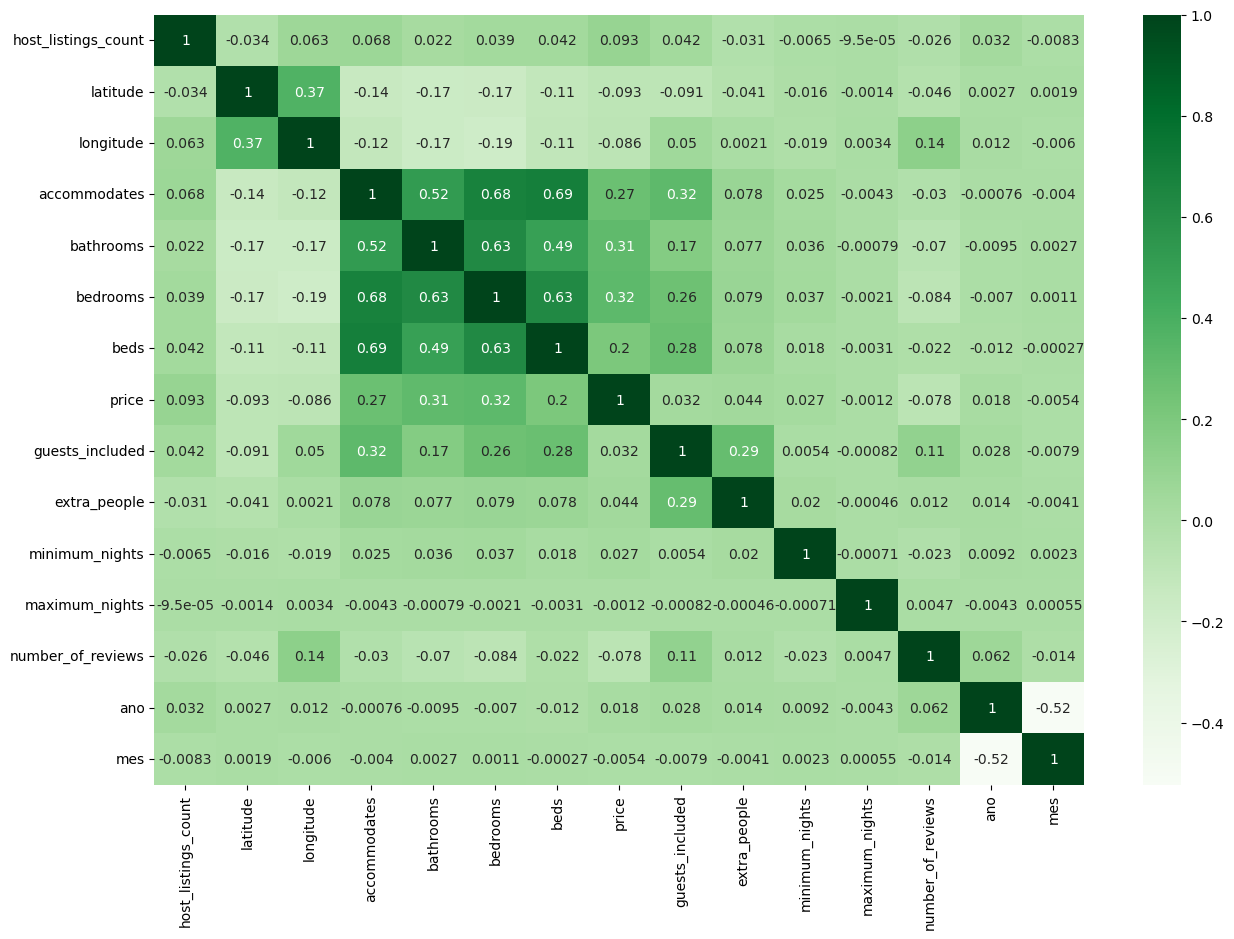

In [14]:
plt.figure(figsize=(15,10))

base_airbnb_corr = base_airbnb[colunas_numericas].corr()

sns.heatmap(base_airbnb_corr, annot=True, cmap="Greens")

### **Definição de funções para a análise de Outliers**

Vamos definir algumas funções para ajudar na análise de outliers das colunas

In [16]:
def limites(coluna):
  quartil_1 = coluna.quantile(0.25)
  quartil_3 = coluna.quantile(0.75)
  amplitude = quartil_3 - quartil_1
  limite_inferior = quartil_1 - 1.5 * amplitude
  limite_superior = quartil_3 + 1.5 * amplitude
  return limite_inferior, limite_superior

def excluir_outliers(df, nome_coluna):
  qtde_linhas = df.shape[0] # Apenas as linhas  
  lim_inferior, lim_superior = limites(df[nome_coluna]) # filtra os limites inferior e superior
  # Filtra as linhas entre o limite superior e inferior e todas as colunas
  df = df.loc[(df[nome_coluna] >= lim_inferior) & (df[nome_coluna] <= lim_superior), :]
  linhas_removidas = qtde_linhas - df.shape[0] # Contar quantas linhas foram removidas
  # Retorna o Dataframe e as linhas removidas
  return df, linhas_removidas

In [17]:
def diagrama_caixa(coluna):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(15, 5)
  sns.boxplot(x=coluna, ax=ax1)
  ax2.set_xlim(limites(coluna))
  sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
  plt.figure(figsize=(20, 10))
  sns.displot(coluna, kind='hist')

def grafico_bar(coluna):
  plt.figure(figsize=(15,5))
  ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
  ax.set_xlim(limites(coluna))

### **price**

C:\Users\DaniloSantos\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


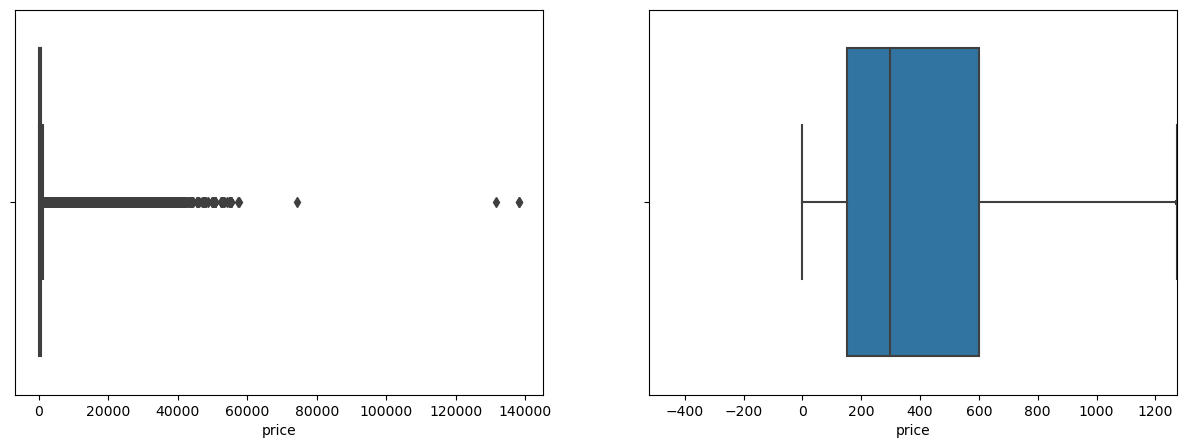

<Figure size 2000x1000 with 0 Axes>

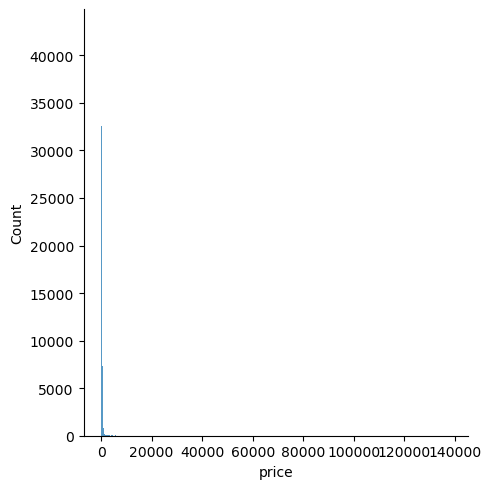

In [18]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

Como estamos construindo um modelo para imóveis comuns, acredito que os valores acima dos limites superior, são apenas apartamentos de luxo que não são nossos objetivos principais. Por isso, podemos excluir esses outliers.

In [19]:
# Remover outliers
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'price')
print(f'{linhas_removidas} linhas removidas')

86920 linhas removidas


(801734, 24)


C:\Users\DaniloSantos\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

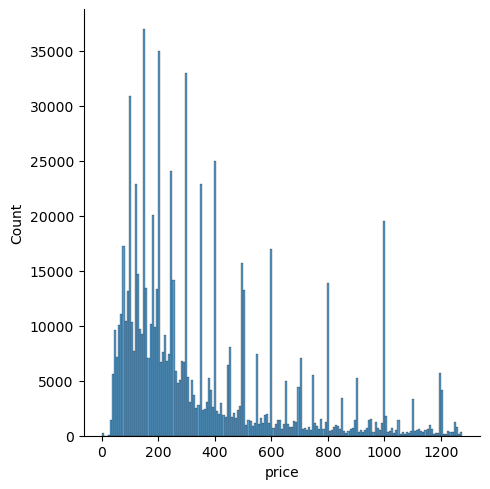

In [20]:
histograma(base_airbnb['price'])
print(base_airbnb.shape)

### **extra_people**

C:\Users\DaniloSantos\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


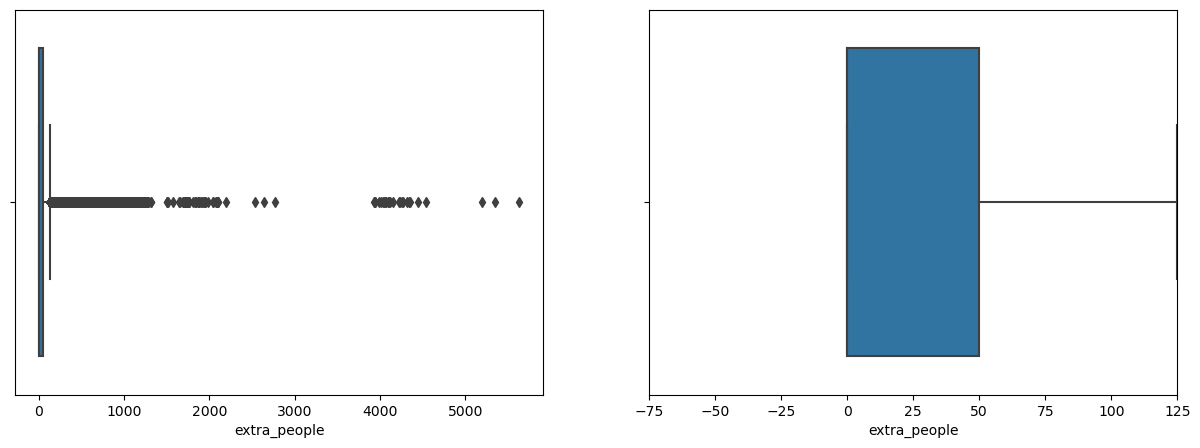

<Figure size 2000x1000 with 0 Axes>

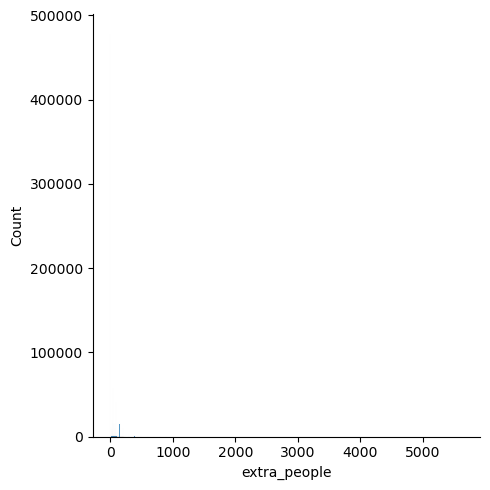

In [21]:
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

In [24]:
# Remover outliers
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'extra_people')
print(f'{linhas_removidas} linhas removidas')

3403 linhas removidas


(732318, 24)


C:\Users\DaniloSantos\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

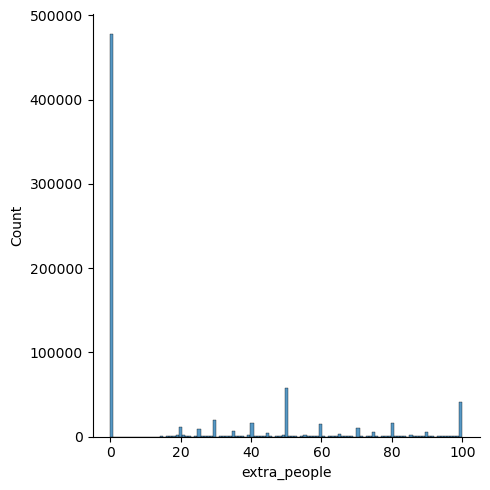

In [25]:
histograma(base_airbnb['extra_people'])
print(base_airbnb.shape)

### **host_listings_count**

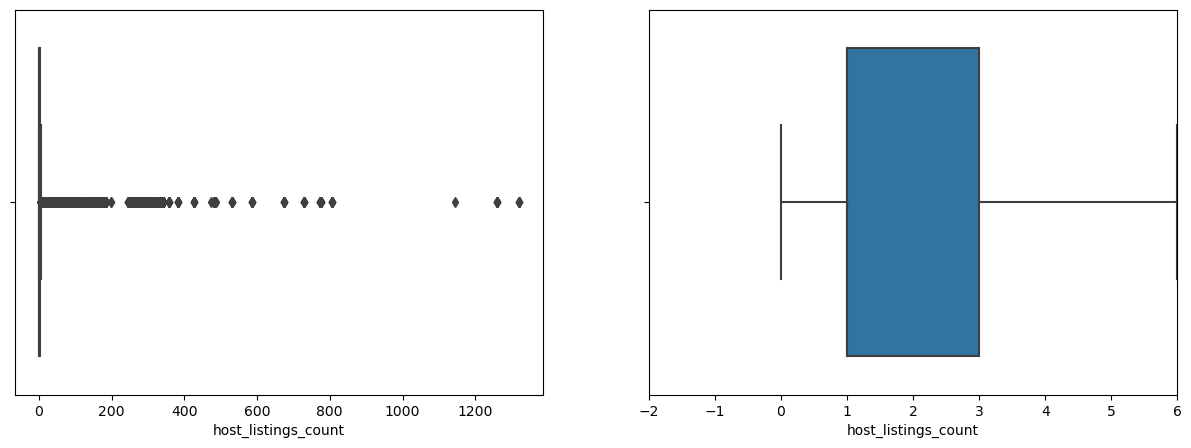

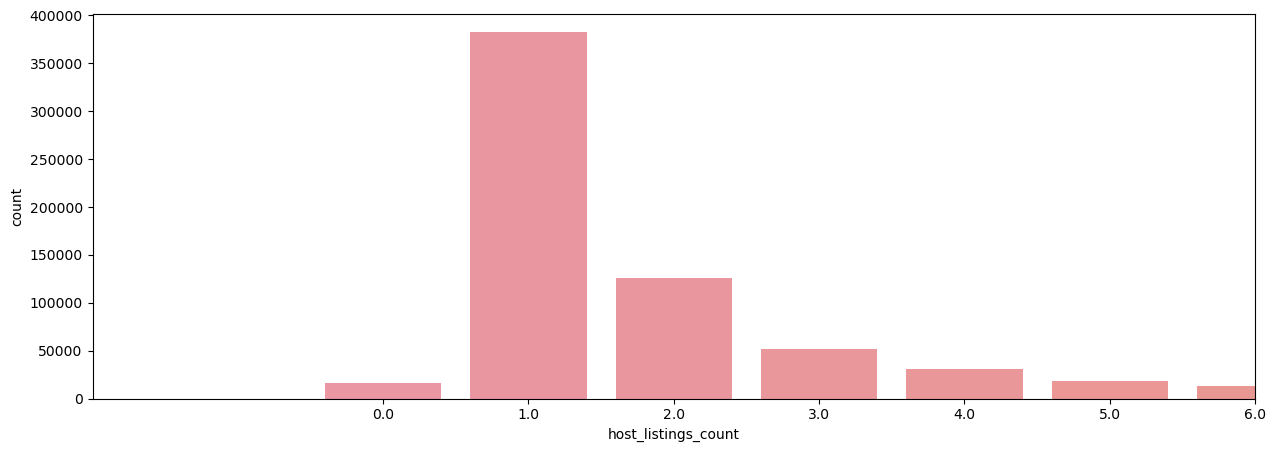

In [26]:
diagrama_caixa(base_airbnb['host_listings_count'])
grafico_bar(base_airbnb['host_listings_count'])

Podemos excluir os outiliers, porque para o objetivo do nosso projeto hosts com mais de 6 imóveis no airbnb não é o público alvo do do projeto.

In [27]:
# Remover outiliers
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'host_listings_count')
print(f'{linhas_removidas} linhas removidas')

94651 linhas removidas


### **accommodates**

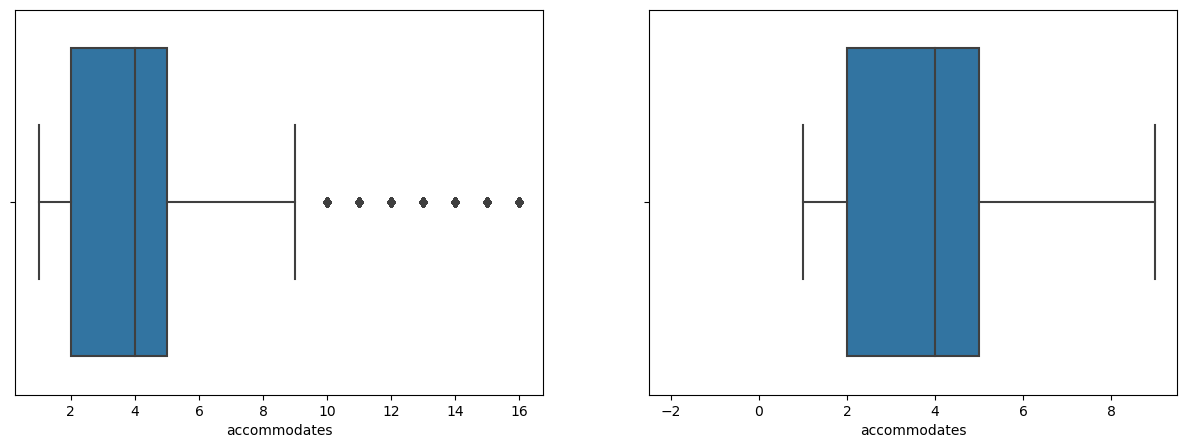

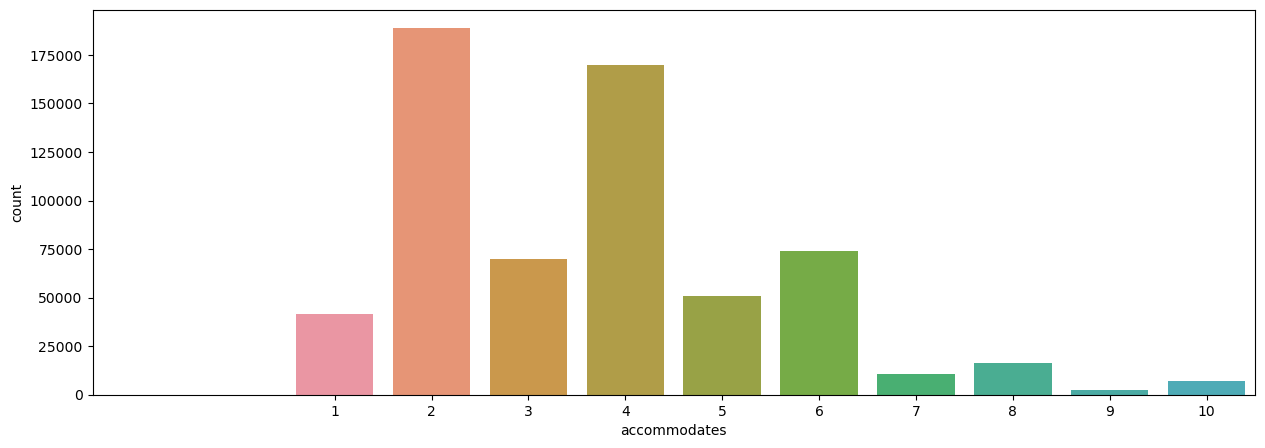

In [28]:
diagrama_caixa(base_airbnb['accommodates'])
grafico_bar(base_airbnb['accommodates'])

In [29]:
# Remover outiliers
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'accommodates')
print(f'{linhas_removidas} linhas removidas')

12653 linhas removidas


### **bathrooms**

<Axes: xlabel='bathrooms', ylabel='count'>

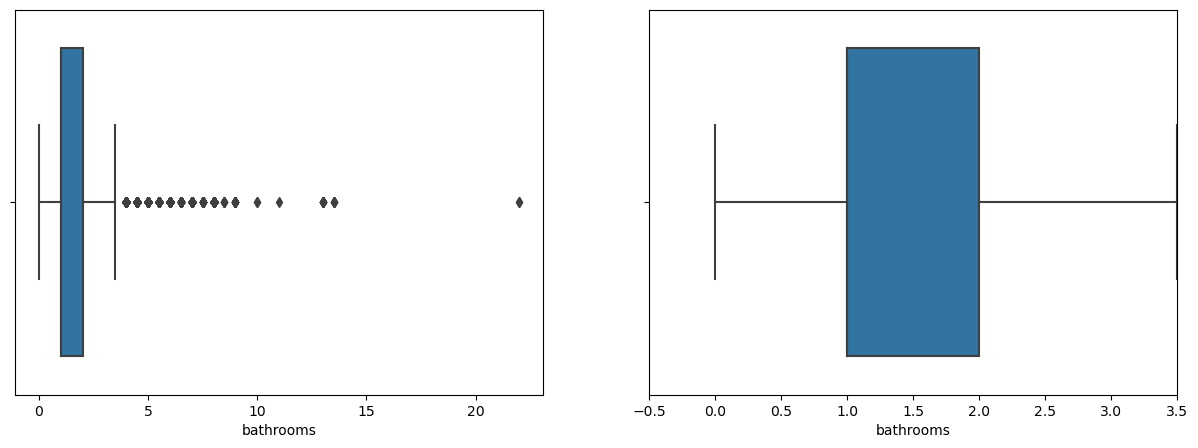

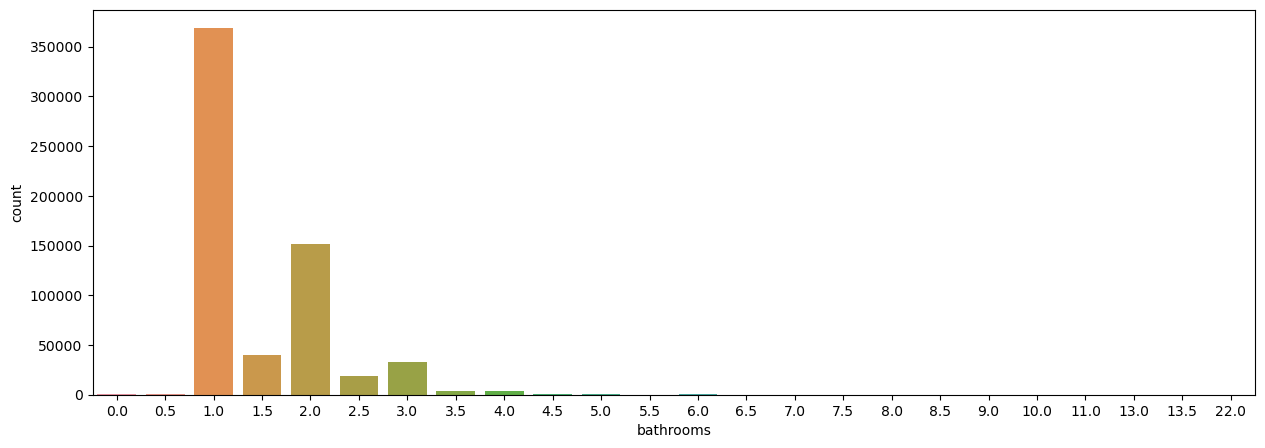

In [30]:
diagrama_caixa(base_airbnb['bathrooms'])
plt.figure(figsize=(15,5))
sns.barplot(x=base_airbnb['bathrooms'].value_counts().index, y=base_airbnb['bathrooms'].value_counts())

In [31]:
# Remover outiliers
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bathrooms')
print(f'{linhas_removidas} linhas removidas')

6677 linhas removidas


### **bedrooms**

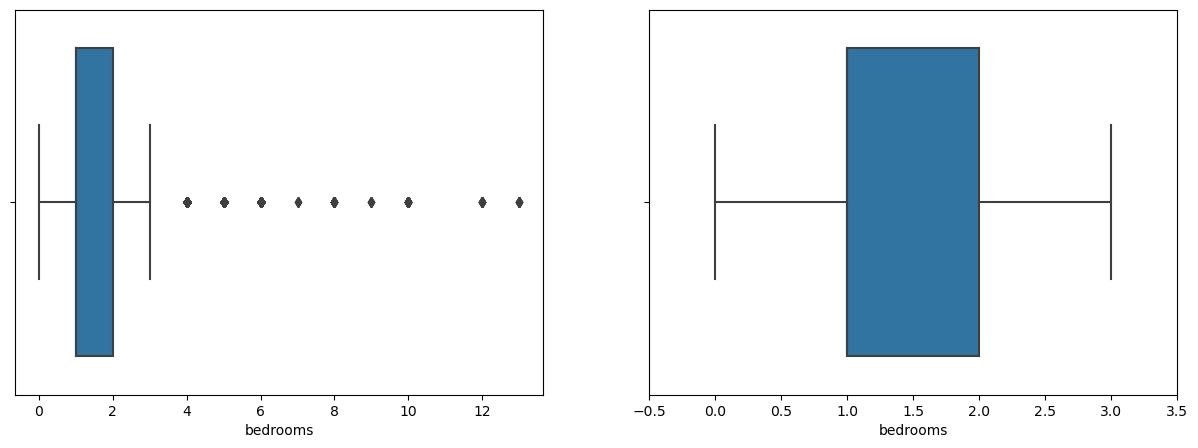

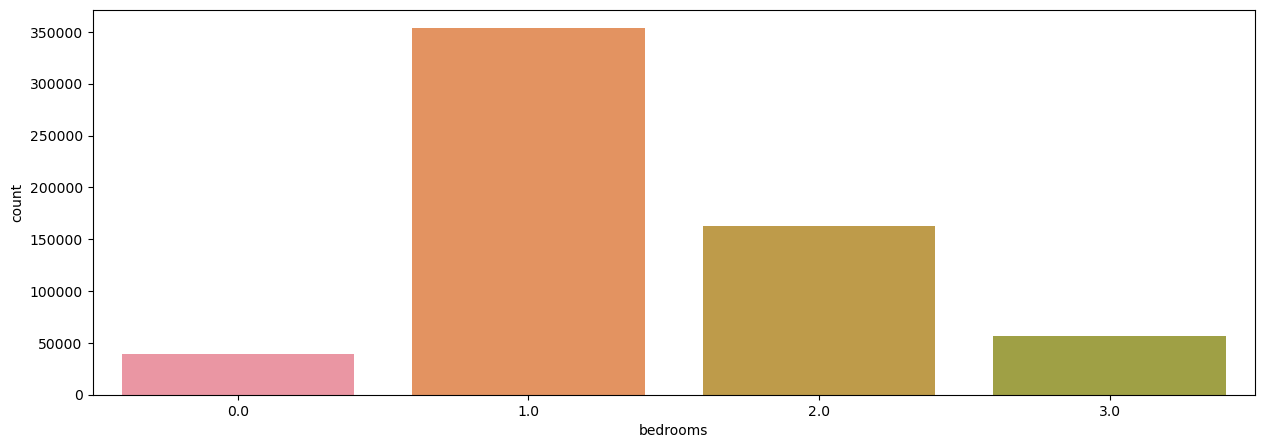

In [32]:
diagrama_caixa(base_airbnb['bedrooms'])
grafico_bar(base_airbnb['bedrooms'])

In [33]:
# Remover outiliers
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bedrooms')
print(f'{linhas_removidas} linhas removidas')

5317 linhas removidas


### **beds**

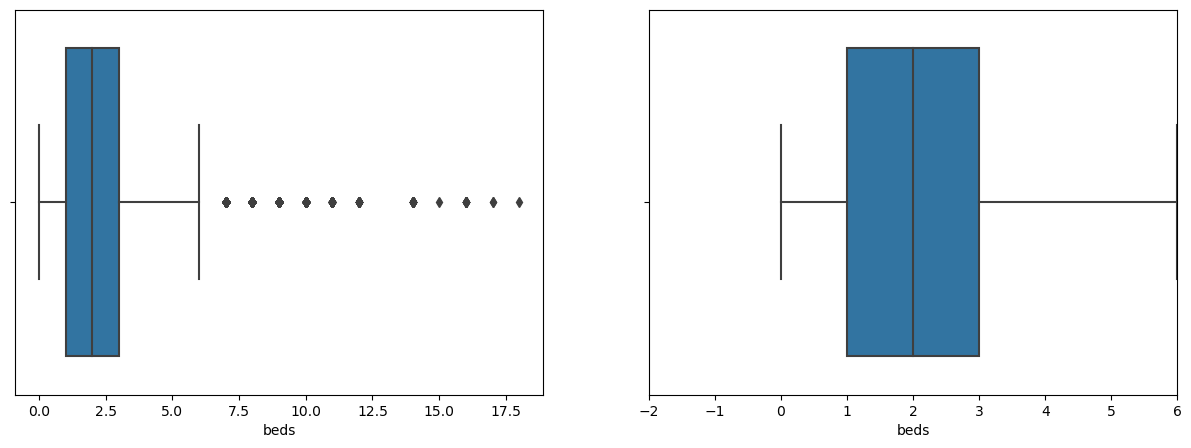

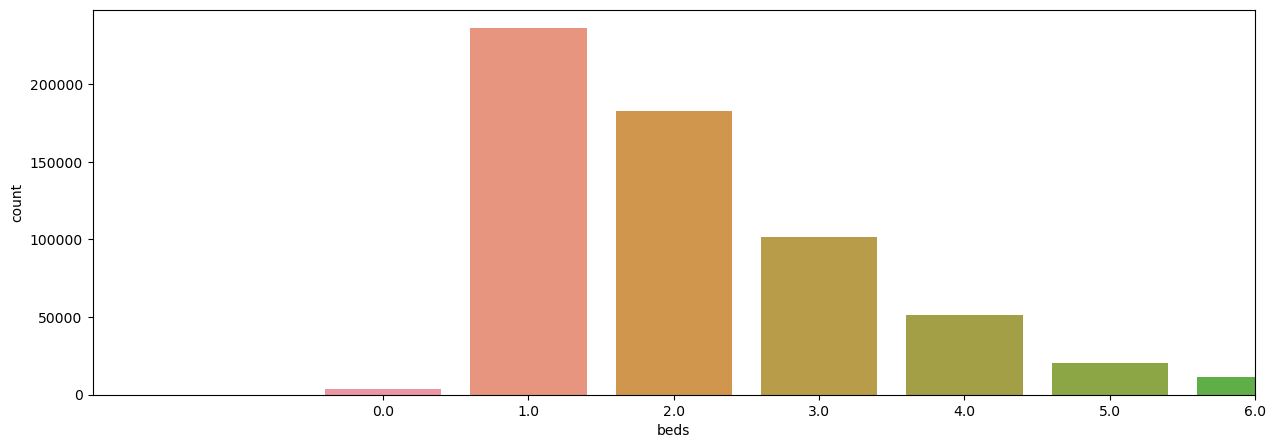

In [34]:
diagrama_caixa(base_airbnb['beds'])
grafico_bar(base_airbnb['beds'])

In [35]:
# Remover outiliers
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'beds')
print(f'{linhas_removidas} linhas removidas')

5434 linhas removidas


### **guests_included**

(1.0, 1.0)


<Axes: xlabel='guests_included', ylabel='count'>

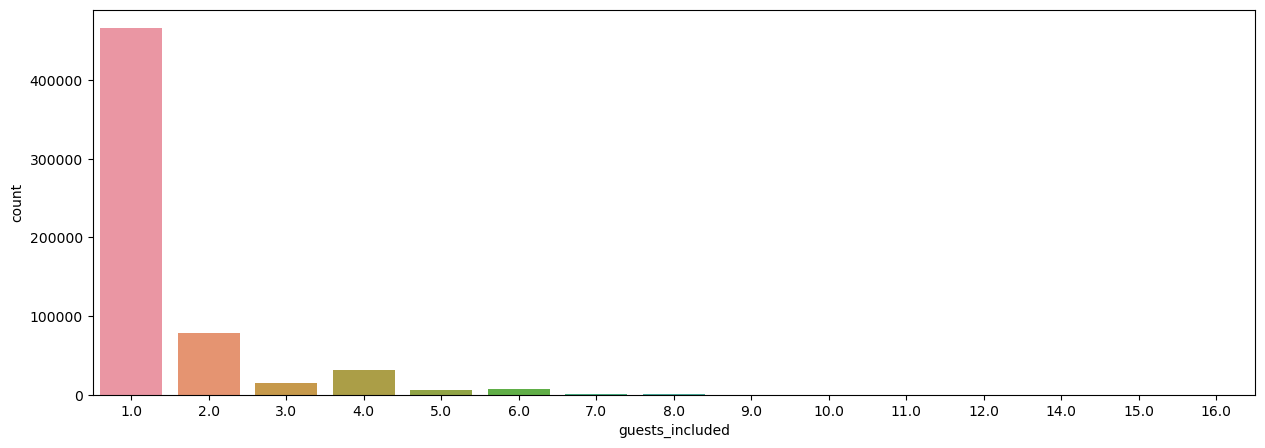

In [36]:
# diagrama_caixa(base_airbnb['guests_included'])
# grafico_bar(base_airbnb['guests_included'])
print(limites(base_airbnb['guests_included']))
plt.figure(figsize=(15,5))
sns.barplot(x=base_airbnb['guests_included'].value_counts().index, y=base_airbnb['guests_included'].value_counts())

Vamos remover essa feature dessa análise porque parece que os usuários usam muito esse padrão como 1 guest included. Isso pode levar o nosso modelo a considerar uma feature verdadeira sendo que a mesma não é essencial para a definição do preço. Desse maneira, parece melhor excluí-la.

In [37]:
base_airbnb = base_airbnb.drop('guests_included', axis=1)
base_airbnb.shape

(607586, 23)

### **minimum_nights**

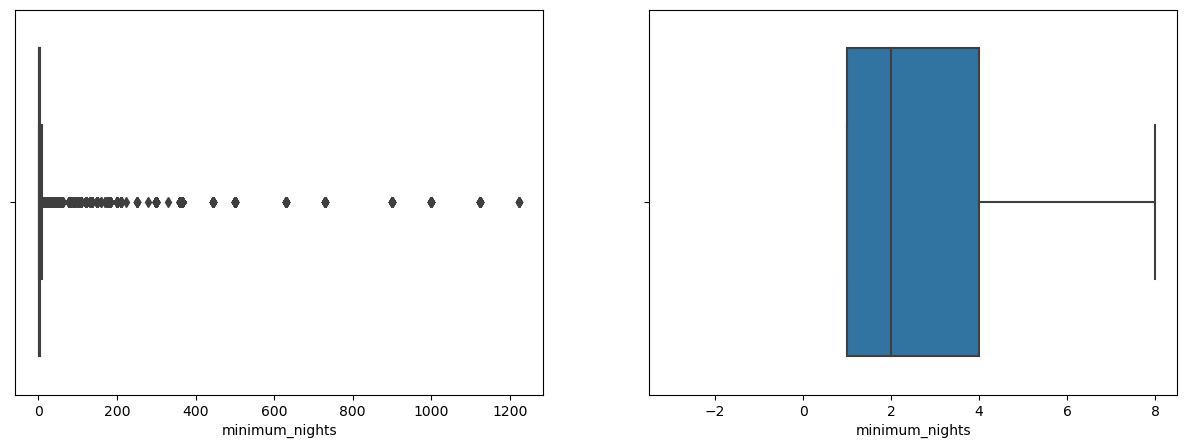

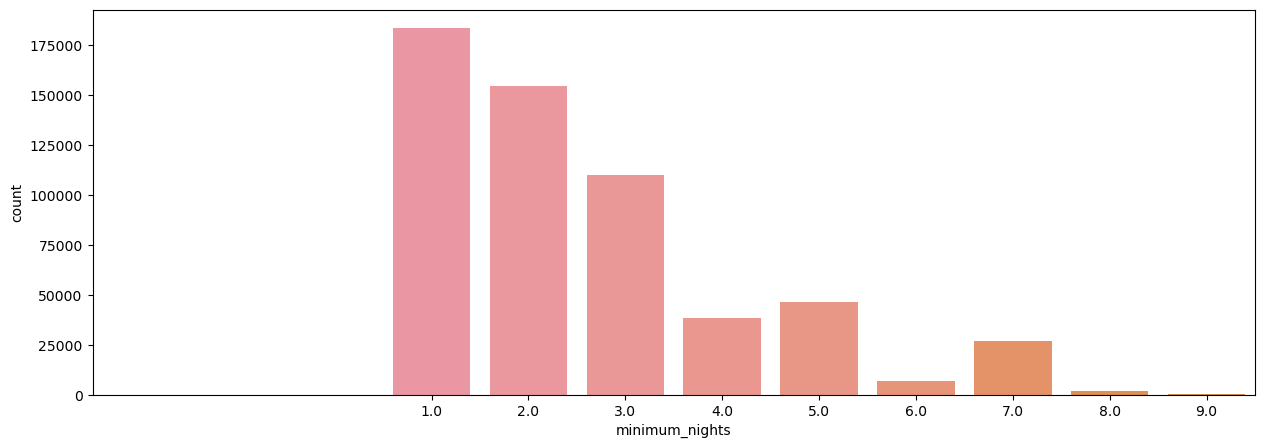

In [38]:
diagrama_caixa(base_airbnb['minimum_nights'])
grafico_bar(base_airbnb['minimum_nights'])

In [39]:
# Remover outiliers
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'minimum_nights')
print(f'{linhas_removidas} linhas removidas')

39948 linhas removidas


### **maximum_nights**

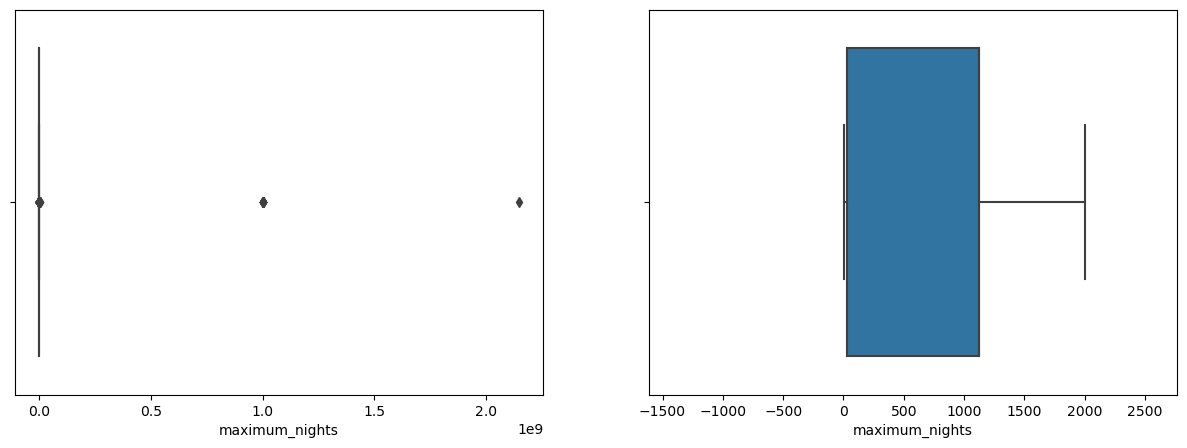

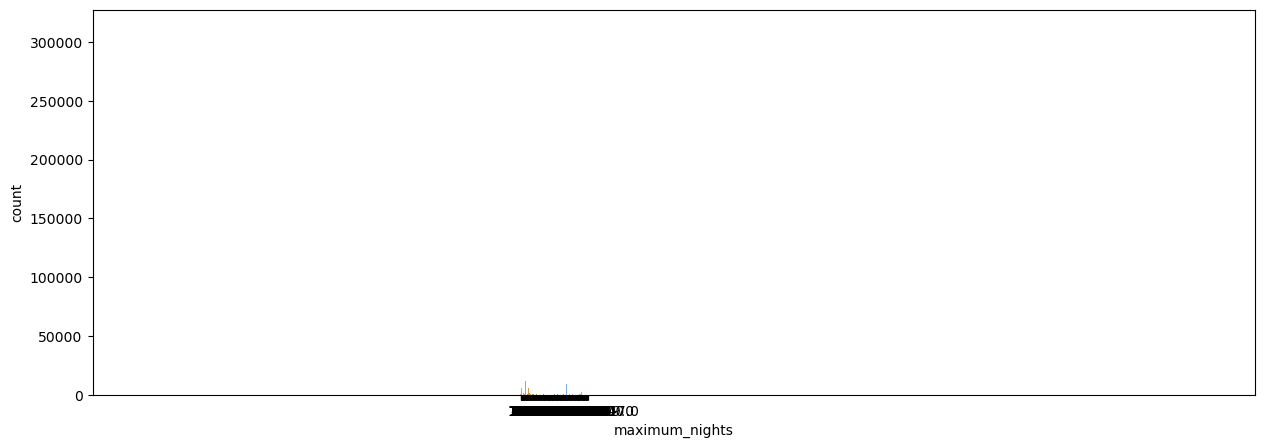

In [40]:
diagrama_caixa(base_airbnb['maximum_nights'])
grafico_bar(base_airbnb['maximum_nights'])

In [41]:
# Remover maximum_nights
base_airbnb = base_airbnb.drop('maximum_nights', axis=1)
base_airbnb.shape

(567638, 22)

### **number_of_reviews**

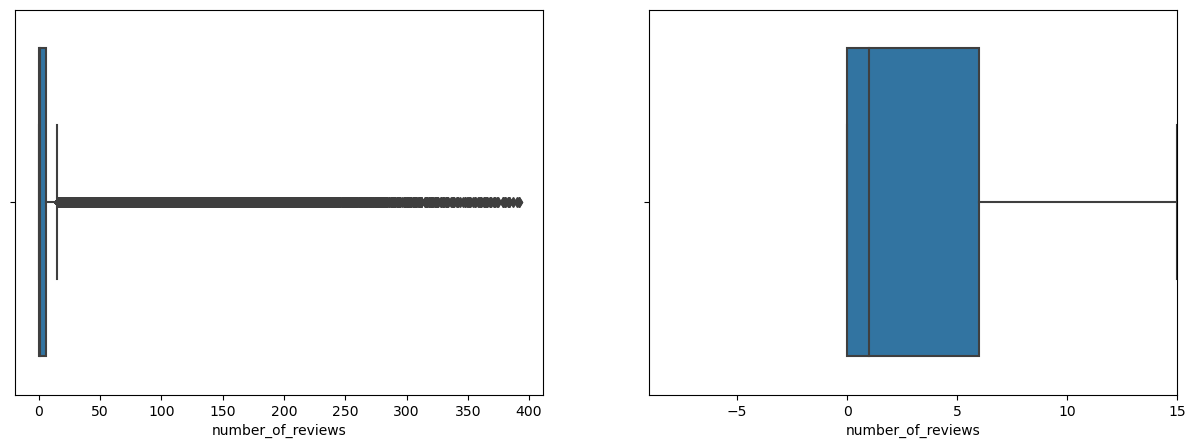

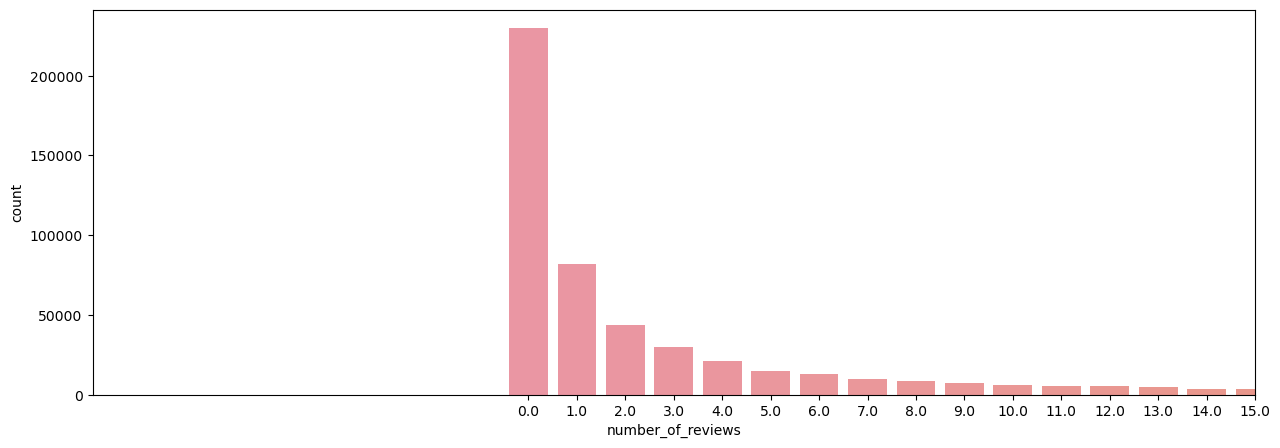

In [42]:
diagrama_caixa(base_airbnb['number_of_reviews'])
grafico_bar(base_airbnb['number_of_reviews'])

In [43]:
# Remover number_of_reviews
base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)
base_airbnb.shape

(567638, 21)

### **Tratamento de colunas de valores de texto**


### **property_type**

property_type
Apartment                 447690
House                      50071
Condominium                25547
Serviced apartment         12258
Loft                       11887
Guest suite                 3537
Bed and breakfast           3398
Hostel                      2629
Guesthouse                  2073
Other                       1907
Villa                       1251
Townhouse                    937
Aparthotel                   656
Chalet                       469
Earth house                  456
Tiny house                   444
Boutique hotel               438
Hotel                        355
Casa particular (Cuba)       279
Cottage                      224
Bungalow                     197
Dorm                         185
Cabin                        140
Nature lodge                 124
Treehouse                     75
Castle                        57
Island                        54
Boat                          52
Hut                           39
Resort                       

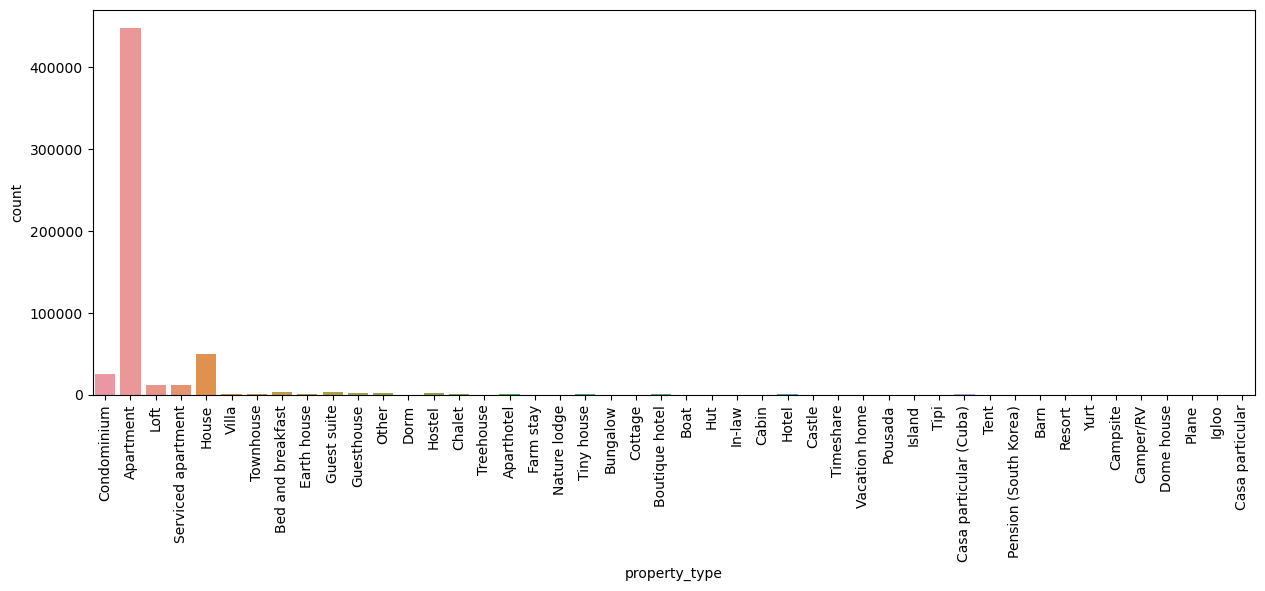

In [44]:
print(base_airbnb['property_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x='property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

['Other', 'Villa', 'Townhouse', 'Aparthotel', 'Chalet', 'Earth house', 'Tiny house', 'Boutique hotel', 'Hotel', 'Casa particular (Cuba)', 'Cottage', 'Bungalow', 'Dorm', 'Cabin', 'Nature lodge', 'Treehouse', 'Castle', 'Island', 'Boat', 'Hut', 'Resort', 'Campsite', 'Camper/RV', 'Yurt', 'Tent', 'Tipi', 'Barn', 'Farm stay', 'Pension (South Korea)', 'Dome house', 'Igloo', 'In-law', 'Vacation home', 'Timeshare', 'Pousada', 'Casa particular', 'Plane']
<bound method IndexOpsMixin.value_counts of 1         Condominium
3           Apartment
4           Apartment
5           Apartment
6                Loft
             ...     
893148      Apartment
893149      Apartment
893150      Apartment
893152      Apartment
893153      Apartment
Name: property_type, Length: 567638, dtype: object>


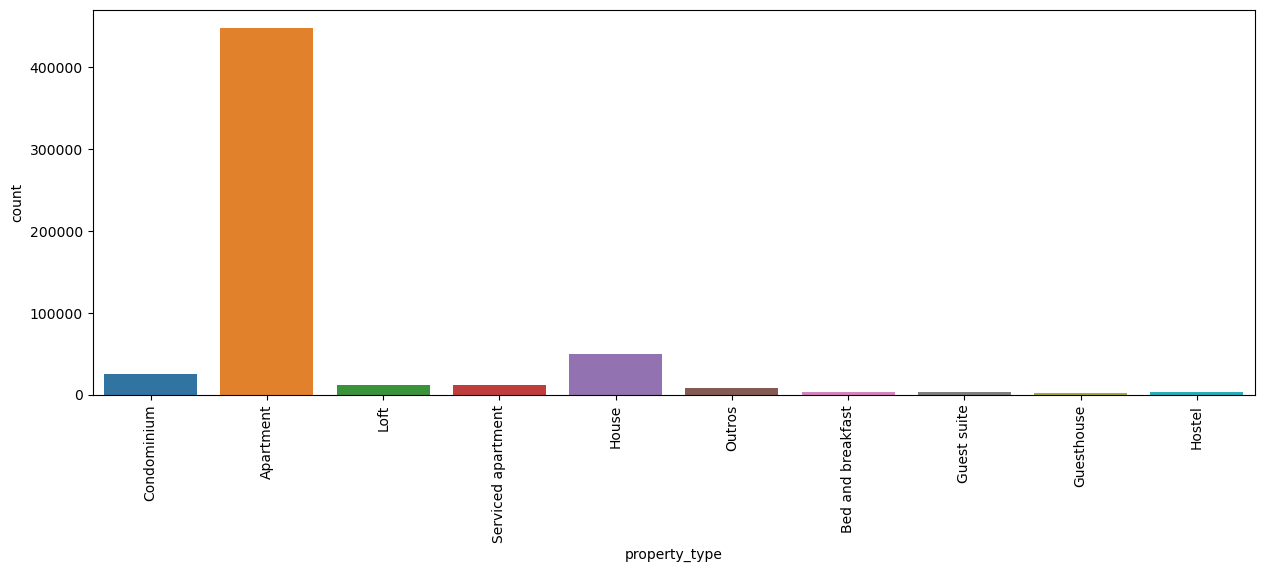

In [45]:
tabela_tipos_casa = base_airbnb['property_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
  if tabela_tipos_casa[tipo] < 2000:
    colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
  base_airbnb.loc[base_airbnb['property_type'] == tipo, 'property_type'] = 'Outros'
print(base_airbnb['property_type'].value_counts)

plt.figure(figsize=(15,5))
grafico = sns.countplot(x='property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

### **room_type**

room_type
Entire home/apt    363052
Private room       192226
Shared room         11400
Hotel room            960
Name: count, dtype: int64


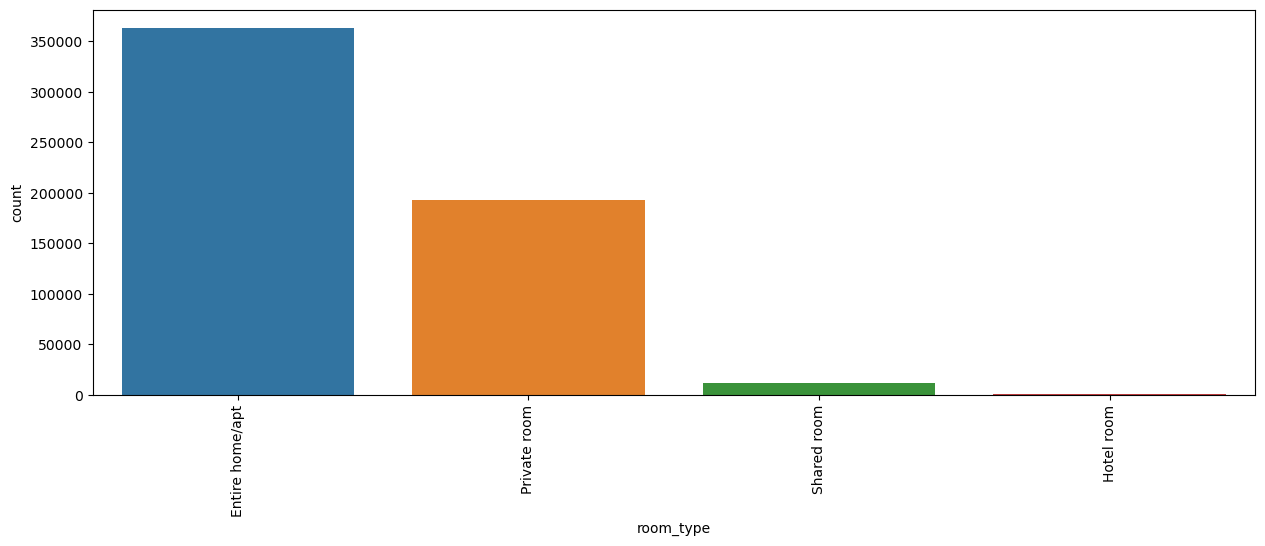

In [46]:
print(base_airbnb['room_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x='room_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

### **bed_type**

bed_type
Real Bed         556439
Pull-out Sofa      7953
Futon              1597
Airbed             1154
Couch               495
Name: count, dtype: int64
['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']
<bound method IndexOpsMixin.value_counts of 1         Real Bed
3         Real Bed
4         Real Bed
5         Real Bed
6         Real Bed
            ...   
893148    Real Bed
893149    Real Bed
893150    Real Bed
893152    Real Bed
893153    Real Bed
Name: bed_type, Length: 567638, dtype: object>


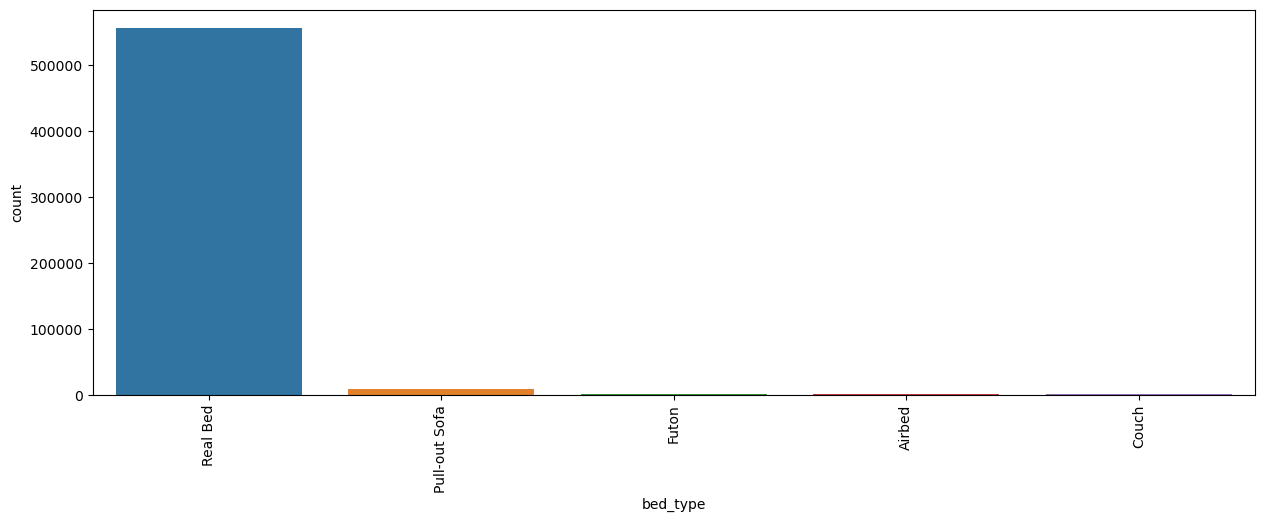

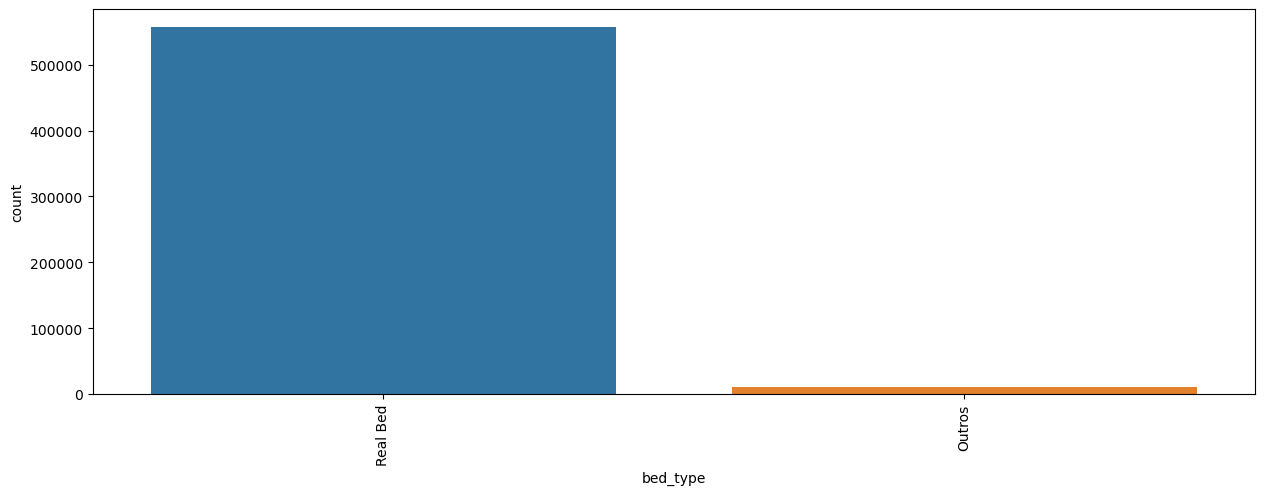

In [47]:
print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x='bed_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

# Agrupando categorias de bed_type
tabela_bed = base_airbnb['bed_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_bed.index:
  if tabela_bed[tipo] < 10000:
    colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
  base_airbnb.loc[base_airbnb['bed_type'] == tipo, 'bed_type'] = 'Outros'
print(base_airbnb['bed_type'].value_counts)

plt.figure(figsize=(15,5))
grafico = sns.countplot(x='bed_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

### **cancellation_policy**

cancellation_policy
flexible                       252277
strict_14_with_grace_period    195361
moderate                       110336
strict                           9504
super_strict_60                   129
super_strict_30                    31
Name: count, dtype: int64
['strict', 'super_strict_60', 'super_strict_30']
<bound method IndexOpsMixin.value_counts of 1                              strict
3                              strict
4                              strict
5                              strict
6                              strict
                     ...             
893148                       flexible
893149                       flexible
893150                       flexible
893152    strict_14_with_grace_period
893153    strict_14_with_grace_period
Name: cancellation_policy, Length: 567638, dtype: object>


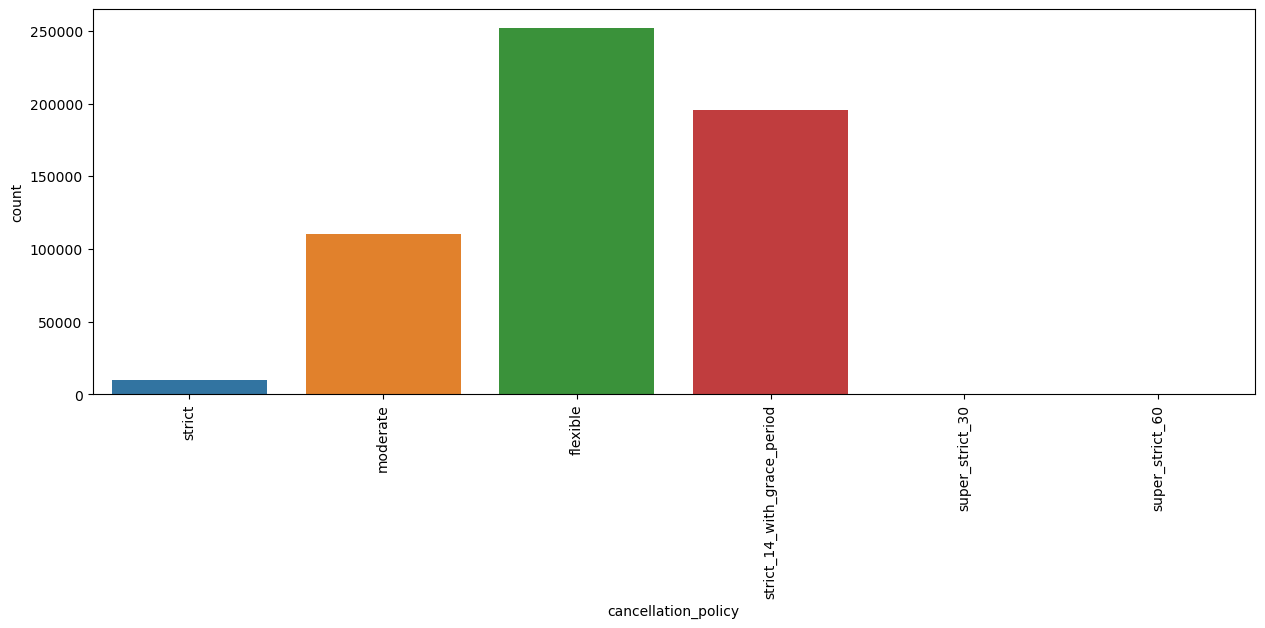

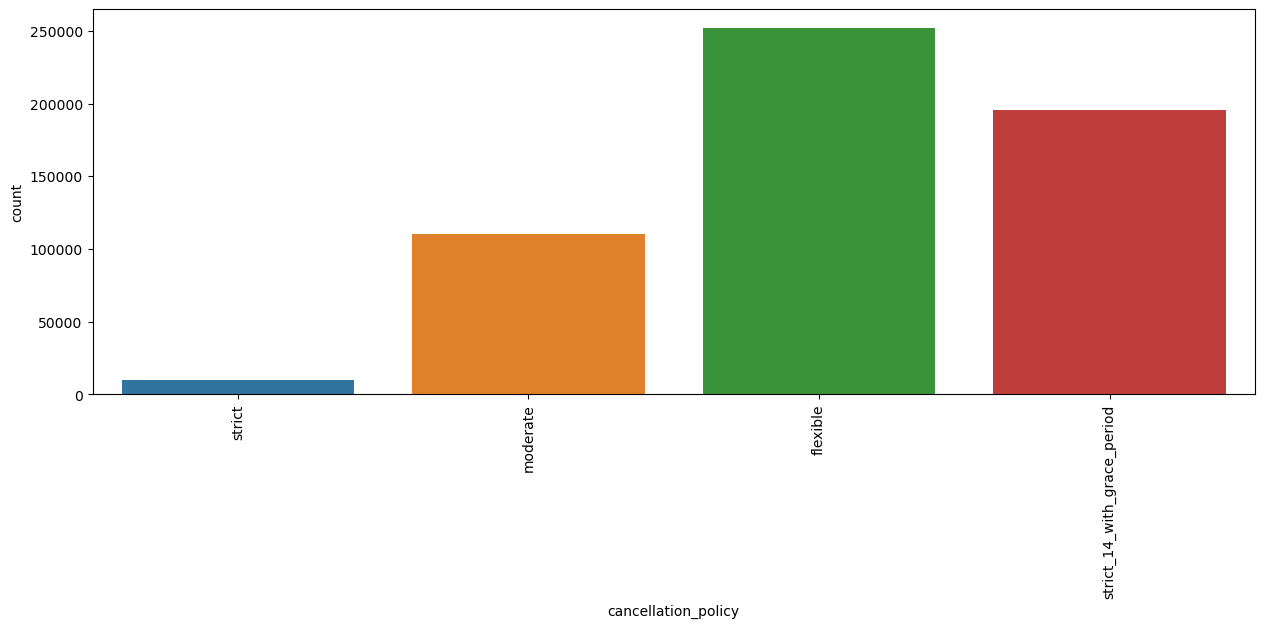

In [48]:
print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x='cancellation_policy', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

# Agrupando categorias de cancellation_policy
tabela_cancellation = base_airbnb['cancellation_policy'].value_counts()
colunas_agrupar = []

for tipo in tabela_cancellation.index:
  if tabela_cancellation[tipo] < 10000:
    colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
  base_airbnb.loc[base_airbnb['cancellation_policy'] == tipo, 'cancellation_policy'] = 'strict'
print(base_airbnb['cancellation_policy'].value_counts)

plt.figure(figsize=(15,5))
grafico = sns.countplot(x='cancellation_policy', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

### **amenities**

Como há uma grande diversidade de amenities e, as vezes, as mesmas foram escritas de modo diferente, vamos avaliar a quantidade delas como parâmetro para o nosso modelo.

In [49]:
# Criação da lista
print(base_airbnb['amenities'].iloc[0].split(','))
# Verificação do tamanho da lista criada
print(len(base_airbnb['amenities'].iloc[0].split(',')))

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', '"Paid parking off premises"', '"Smoking allowed"', 'Doorman', 'Elevator', '"Hot tub"', '"Family/kid friendly"', '"Suitable for events"', 'Essentials', '"24-hour check-in"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"', '"Self check-in"', '"Front desk/doorperson"', '"Private entrance"', '"Hot water"', '"Bed linens"', '"Luggage dropoff allowed"}']
25


In [50]:
# Criação da coluna numérica n_amenities
base_airbnb['n_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)

# Remover amenities
base_airbnb = base_airbnb.drop('amenities', axis=1)
base_airbnb.shape

(567638, 21)

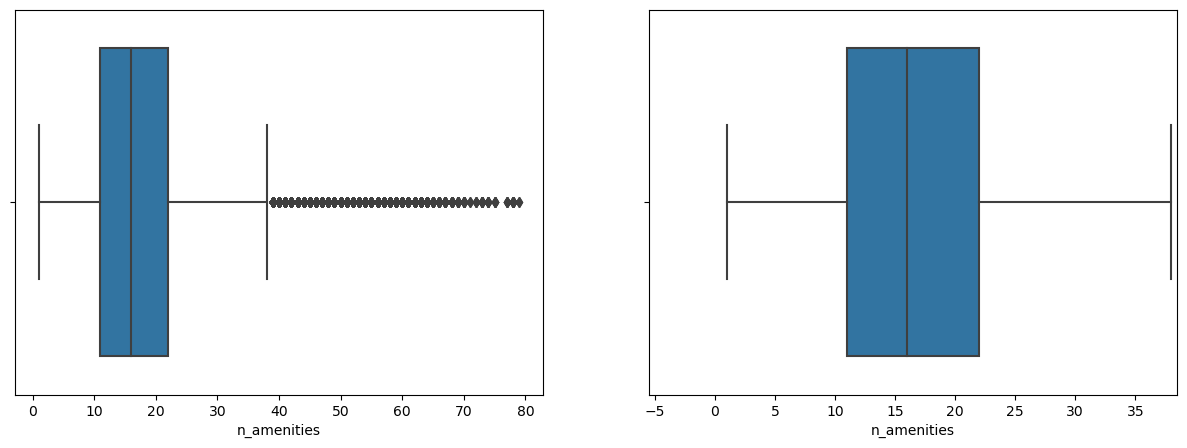

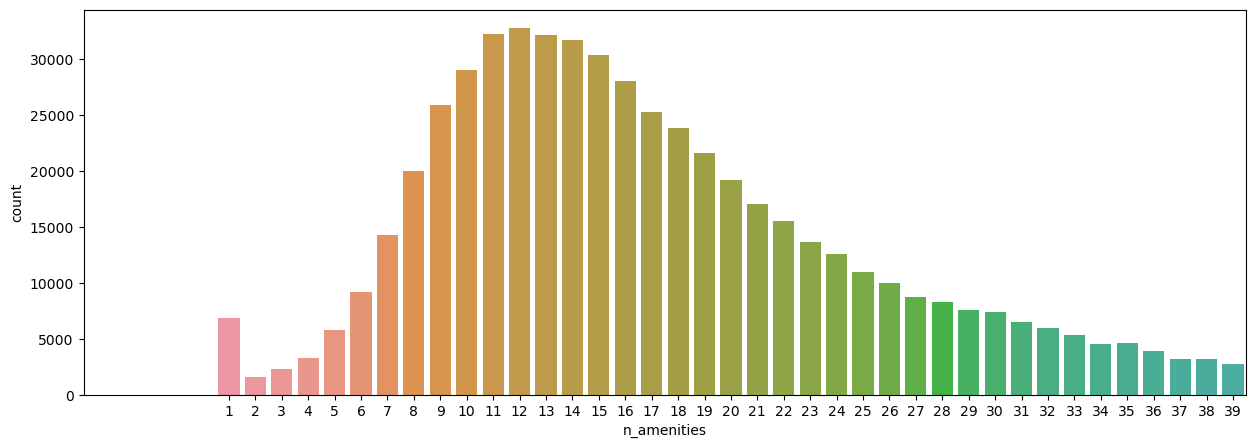

In [51]:
diagrama_caixa(base_airbnb['n_amenities'])
grafico_bar(base_airbnb['n_amenities'])

In [52]:
# Remover outiliers
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'n_amenities')
print(f'{linhas_removidas} linhas removidas')

23526 linhas removidas


### **Visualização de Mapa das Propriedades**

In [53]:
# Amostra aleatória para tornar o código mais rápido e visual
amostra = base_airbnb.sample(n=15000)
# Criação do centro do mapa
centro_mapa = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}
# Criação do mapa
mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude', z='price',
                         title=10*' ' + 'Densidade de preço diário',
                         radius=2.5, center=centro_mapa, zoom=10,
                         mapbox_style='stamen-terrain')
mapa.show()

### **Enconding**
Ajustar as features para facilitar o trabalho do modelo futuro.

- Features de valores true ou false serão substituídas por 1 e 0;
- Features de categoria, nas quais os valores são textos, utilizaremos o método de enconding de variáveis dummies.

In [54]:
base_airbnb_cod = base_airbnb.copy()
# Alteração de true e false para 1 e 0
colunas_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
for coluna in colunas_tf:
  base_airbnb_cod.loc[base_airbnb_cod[coluna]=='t', coluna] = 1
  base_airbnb_cod.loc[base_airbnb_cod[coluna]=='f', coluna] = 0

# Encontrar colunas com object dtype que devem conter ocorrencia de strings
object_cols = base_airbnb_cod.select_dtypes(include=['object']).columns

# Loop através dessas colunas e tentar convertê-las em float
for col in object_cols:
  try:
    # Trocar (Replace) sinal de dolar e vígurla antes de converter
    base_airbnb_cod[col] = base_airbnb_cod[col].str.replace('$', '').str.replace(',', '')
    base_airbnb_cod[col] = base_airbnb_cod[col].astype(np.float32)
  except (ValueError, AttributeError):
    # Se a conversão falhar, pode ser uma coluna não numérica, então pule
    pass

colunas_categorias = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']
base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod, columns=colunas_categorias)
display(base_airbnb_cod.head())

host_is_superhost  host_listings_count   latitude  longitude  accommodates  \
1                 1                  2.0 -22.965919 -43.178962             5   
3                 0                  3.0 -22.977117 -43.190454             3   
4                 1                  1.0 -22.983024 -43.214270             3   
5                 1                  1.0 -22.988165 -43.193588             3   
6                 1                  1.0 -22.981269 -43.190457             2   

   bathrooms  bedrooms  beds  price  extra_people  ...  \
1        1.0       2.0   2.0  270.0          51.0  ...   
3        1.0       1.0   2.0  161.0          45.0  ...   
4        1.0       1.0   2.0  222.0          68.0  ...   
5        1.5       1.0   2.0  308.0          86.0  ...   
6        1.0       1.0   2.0  219.0          80.0  ...   

   room_type_Entire home/apt room_type_Hotel room room_type_Private room  \
1                       True                False                  False   
3                       True                False                  False   
4                       True                False                  False   
5                       True                False                  False   
6                       True                False                  False   

   room_type_Shared room  bed_type_Outros  bed_type_Real Bed  \
1                  False            False               True   
3                  False            False               True   
4                  False            False               True   
5                  False            False               True   
6                  False            False               True   

   cancellation_policy_flexible  cancellation_policy_moderate  \
1                         False                         False   
3                         False                         False   
4                         False                         False   
5                         False                         False   
6                         False                         False   

   cancellation_policy_strict  cancellation_policy_strict_14_with_grace_period  
1                        True                                            False  
3                        True                                            False  
4                        True                                            False  
5                        True                                            False  
6                        True                                            False  

[5 rows x 37 columns]

### **Treinando as variáveis**

- Métricas de avaliação

In [55]:
def avaliar_modelo(nome_modelo, y_test, previsao):
  r2 = r2_score(y_test, previsao)
  # Clip predicted values to be greater than 0 before calculating MSLE
  previsao = np.clip(previsao, a_min=1e-10, a_max=None)
  RSME = np.sqrt(mean_squared_log_error(y_test, previsao))
  return f'Modelo {nome_modelo}:\nR²:{r2:.2f}\nRSME:{RSME:.2f}'

In [56]:
y = base_airbnb_cod['price']
X = base_airbnb_cod.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

### **Salvando as variáveis**

In [57]:
# Salvando o arquivo com todas as informações pré-processadas
with open('base_airbnb.pkl', mode = 'wb') as f:
  pickle.dump([X_train, y_train, X_test, y_test], f)

### Modelos de previsão
1. Random Forest

In [59]:
# Abrir o arquico base_airbnb.pkl com o pré-processamento
with open(r'diretorio/base_airbnb.pkl', 'rb') as f: # Colocar o diretório onde foi salvo o arquivo base_airbnb.pkl
  X_train, y_train, X_test, y_test = pickle.load(f)

In [60]:
# treinar
modelo_rf = RandomForestRegressor()
modelo_rf.fit(X_train, y_train)

# testar
previsao = modelo_rf.predict(X_test)
print(avaliar_modelo('Random Forest', y_test, previsao))

Modelo Random Forest:
R²:0.98
RSME:0.14


2. Linear Regression

In [61]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# testar
previsao = modelo_lr.predict(X_test)
print(avaliar_modelo('Linear Regression', y_test, previsao))

Modelo Linear Regression:
R²:0.33
RSME:0.75


3. Extra Trees Regressor

In [62]:
modelo_et = ExtraTreesRegressor()
modelo_et.fit(X_train, y_train)

# testar
previsao = modelo_et.predict(X_test)
print(avaliar_modelo('Extra Trees Regressor', y_test, previsao))

Modelo Extra Trees Regressor:
R²:0.98
RSME:0.13


### **Análise do Melhor Modelo**

- Modelo escolhido: ExtraTreesRegressor;

- Quando comparamos o Random Forest e o ExtraTreesRegressor, observamos valores próximos de R² e RSME, mas o modelo escolhido apresenta valores relativamente superiores, por isso será a opção escolhida;

- O Linear Regressor mostrou-se insatisfatório quando comparado aos indicadores dos outros dois modelos. Dessa forma, deixou de ser uma opção para seguir na análise.

### **Ajustes e Melhorias no Melhor Modelo**

In [63]:
# Importância de cada feature em ExtraTreesRegressor
print(modelo_et.feature_importances_)

[0.01272458 0.03929943 0.10405672 0.10150869 0.07449983 0.0741416
 0.09994321 0.05201569 0.04414907 0.06378307 0.02108392 0.
 0.011114   0.00453542 0.05126494 0.08812121 0.01256225 0.00137277
 0.00539906 0.00070414 0.00087999 0.00065338 0.00724479 0.00211453
 0.00231022 0.00228238 0.07196477 0.00029988 0.0035677  0.00189002
 0.00262802 0.00271259 0.01806943 0.01252783 0.00086113 0.00771377]


In [64]:
# Colunas
print(X_train.columns)

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'extra_people',
       'minimum_nights', 'instant_bookable', 'is_business_travel_ready', 'ano',
       'mes', 'extra people', 'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Outros', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Outros',
       'bed_type_Real Bed', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period'],
      dtype='object')


In [65]:
# Tabela com ordem de importância
importancia_features = pd.DataFrame(modelo_et.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)

0
latitude                                         0.104057
longitude                                        0.101509
bedrooms                                         0.099943
n_amenities                                      0.088121
accommodates                                     0.074500
bathrooms                                        0.074142
room_type_Entire home/apt                        0.071965
minimum_nights                                   0.063783
beds                                             0.052016
extra people                                     0.051265
extra_people                                     0.044149
host_listings_count                              0.039299
instant_bookable                                 0.021084
cancellation_policy_flexible                     0.018069
host_is_superhost                                0.012725
property_type_Apartment                          0.012562
cancellation_policy_moderate                     0.012528
ano                                              0.011114
cancellation_policy_strict_14_with_grace_period  0.007714
property_type_House                              0.007245
property_type_Condominium                        0.005399
mes                                              0.004535
room_type_Private room                           0.003568
bed_type_Real Bed                                0.002713
bed_type_Outros                                  0.002628
property_type_Outros                             0.002310
property_type_Serviced apartment                 0.002282
property_type_Loft                               0.002115
room_type_Shared room                            0.001890
property_type_Bed and breakfast                  0.001373
property_type_Guesthouse                         0.000880
cancellation_policy_strict                       0.000861
property_type_Guest suite                        0.000704
property_type_Hostel                             0.000653
room_type_Hotel room                             0.000300
is_business_travel_ready                         0.000000

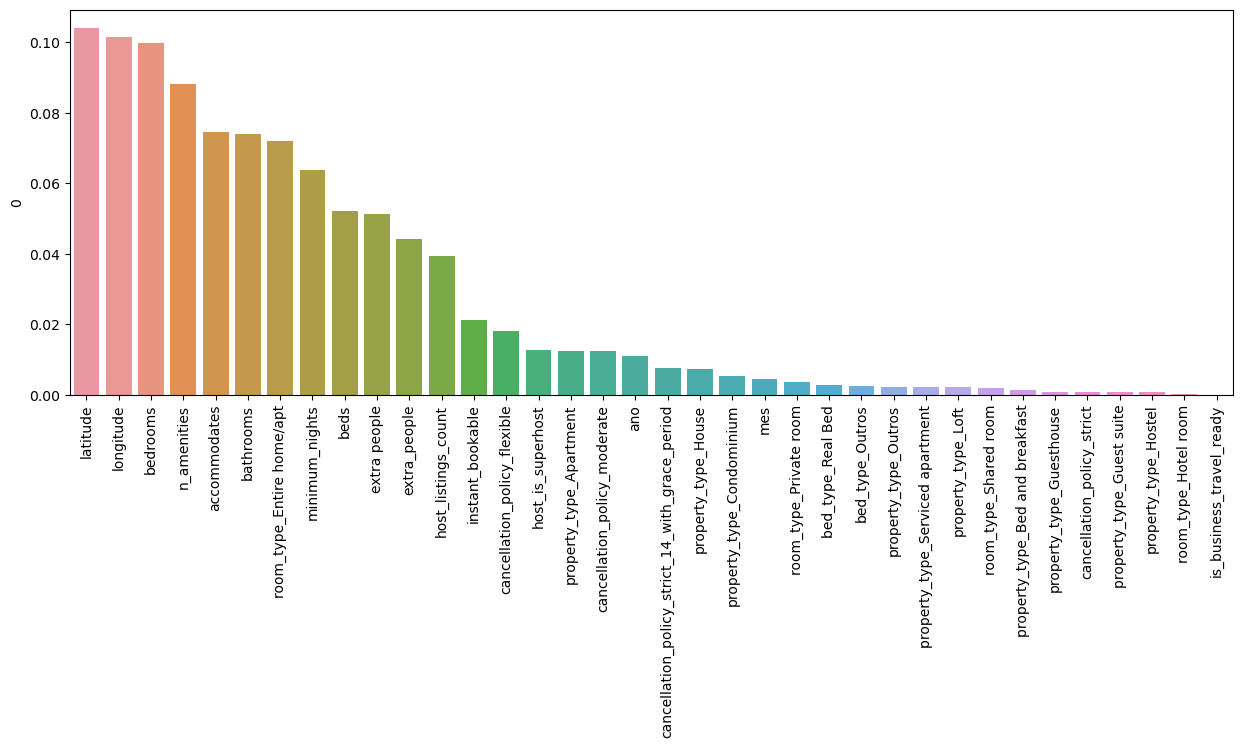

In [66]:
# Gráfico de barras
plt.figure(figsize=(15,5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

### **Ajustes finais no modelo**

- is_business_travel_ready parece não impactar na análise, por isso exluíremos para treinar novamente o modelo de previsão.



In [67]:
if 'is_business_travel_ready' in base_airbnb_cod.columns:
  base_airbnb_cod = base_airbnb_cod.drop('is_business_travel_ready', axis=1)

y = base_airbnb_cod['price']
X = base_airbnb_cod.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)

### **Salvando as novas variáveis**


In [68]:
# Salvando o arquivo com todas as informações pré-processadas
with open('base_airbnb_2.pkl', mode = 'wb') as f:
  pickle.dump([X_train, y_train, X_test, y_test], f)

### Treinando sem a coluna 'is_business_travel_ready'

In [70]:
# Abrir o arquico base_airbnb.pkl com o pré-processamento
with open(r'diretorio/base_airbnb_2.pkl', 'rb') as f: # Colocar o diretório onde foi salvo o arquivo base_airbnb_2.pkl
  X_train, y_train, X_test, y_test = pickle.load(f)

modelo_et = ExtraTreesRegressor()
modelo_et.fit(X_train, y_train)
previsao = modelo_et.predict(X_test)
print(avaliar_modelo('Extra Trees Regressor', y_test, previsao))

Modelo Extra Trees Regressor:
R²:0.98
RSME:0.13


- Retirando as colunas bed_type_Real Bed e bed_type para testar a acurácia do modelo

In [71]:
base_teste = base_airbnb_cod.copy()

for coluna in base_teste:
  if 'bed_type' in coluna:
    base_teste = base_teste.drop(coluna, axis=1)

y = base_teste['price']
X = base_teste.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

### **Salvando as variáveis**

In [72]:
# Salvando o arquivo com todas as informações pré-processadas
with open('base_airbnb_3.pkl', mode = 'wb') as f:
  pickle.dump([X_train, y_train, X_test, y_test], f)

In [74]:
# Abrir o arquivo com todas as informações pré-processadas
with open(r'diretorio/base_airbnb_3.pkl', 'rb') as f: # Colocar o diretório onde foi salvo o arquivo base_airbnb_3.pkl
  X_train, y_train, X_test, y_test = pickle.load(f)

In [75]:
modelo_et = ExtraTreesRegressor()
modelo_et.fit(X_train, y_train)

# testar
previsao = modelo_et.predict(X_test)
print(avaliar_modelo('Extra Trees Regressor', y_test, previsao))

Modelo Extra Trees Regressor:
R²:0.97
RSME:0.14


### **Deploy do Projeto**

- Passo 1 => Criar um arquivo do Modelo (joblib)
- Passo 2 => Escolher a forma de deploy
  - Arquivo Executável + Tkinter
  - Deploy em um Microsite (Flask)
  - Deploy apenas para uso direto (Streamlit)
- Passo 3 => Outro arquivo Python
- Passo 4 => Importar stremlit e criar código
- Passo 5 => Atribuir ao botão o carregamento do modelo
- Passo 6 => Deploy feito